# Wisconsin Wolf Analysis Final Report

## Introduction
Since the late 1990s, the Wisconsin wolf population has been on the rise and currently stands at 972 individuals. However, Wisconsin residents, especially those in the northern portions of the state, have expressed growing concern about the prevalence of wolves. They argue that the wolves are not only dangerous to the local animal populations, but also to humans. These residents claim that the wolves frequently kill their livestock, have a negative impact on the deer population, and are very dangerous towards humans. This report aims to investigate these claims using statistical analysis from multiple sources. Specifically, we will be addressing these three questions:
- How has the growth in the Wisconsin Gray Wolf population impacted the Wisconsin deer population?
- Has the growing wolf population impacted humans?
- How have the lives and deaths of wolves changed over the reporting period?

## Data

The datasets used to investigate the impacts of the growing wolf population in Wisconsin are pulled from data available on the Wisconsin Department of Natural Resources (DNR) website.

Data related to wolves and their interactions with people were extracted from annual Wolf Monitoring Reports. This analysis used reports from 2017 to 2022, which can be downloaded from the "Reports" tab of the following website:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://dnr.wisconsin.gov/topic/WildlifeHabitat/wolf/index.html

Copies of the Wolf Monitoring Reports are saved in the WisconsinWolfAnalysis/pdf folder. The folder also contains subfolders for each report showing the raw data extracted from the pdf file. The WisconsinWolfAnalysis/csv folder contains combined files from this extraction with data for a particular parameter across multiple years. Some of the data extracted and combined from these reports include total wolf population, number of cattle killed by wolves, number of dogs killed by wolves, and verified wolf observations.

Data on deer in Wisconsin are also provided by the Wisconsin DNR. Data on historical deer population, deer harvest, and deer seen per hunted hour are available here:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;deer population: https://dnr.wi.gov/wideermetrics/DeerStats.aspx?R=2  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;deer harvest: https://dnr.wi.gov/wideermetrics/DeerStats.aspx  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;hunter survey: https://dnr.wi.gov/wideermetrics/DeerStats.aspx?R=OBSurvey  

Unfortunately, the data in these pages was not available in an easily ingestible format and pdf printouts of the pages could not be parsed by either the camelot or tabula-py pdf extraction packages. For documentation purposes, pdf printouts of those pages have been placed in the WisconsinWolfAnalysis/pdf/PDFs_that_could_not_be_parsed folder. Additionally, hand-entered data from those plots are stored in the WisconsinWolfAnalysis/csv folder.

Data on deer chronic wasting disease (CWD) was also considered to investigate if the number of wolves is impacting the "quality" of deer in Wisconsin. Yearly data on Chronic Wasting Disease (CWD) testing is available as downloadable csv files from this website:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://dnr.wi.gov/wmcwd/Summary/Zone

The analysis of changes in wolf population and deer CWD included data from 2002 to 2022. Data from 1999-2001 was excluded because it is only available in a combined file. The data from each year used in the analysis have been stored in WisconsinWolfAnalysis/csv/deer_chronic_wasting_disease/, and the summarized data has been combined into one file WisconsinWolfAnalysis/csv/deer_chronic_wasting_disease_by_year.csv.

## Statistical Analysis and Results

### Question 1: Has the growth in the Wisconsin Gray Wolf population impacted the Wisconsin deer population?

To quantify "impact" our team leveraged the Pearson's Correlation Coefficient. The coefficient ranges between -1 and 1, with values greater than 0 indicating a positive correlation (e.g., as one population grows so does the other) and values less than 0 indicating a negative correlation (e.g., as one population grows the other shrinks). The closer the coefficient is to 1 or -1 the stronger the correlation. To validate that the correlation coefficient is statistically different from zero we will also be reporting its p-value. We have chosen 0.05 as the benchmark for statistical significance. Any p-values less than 0.05 will lead us to reject the null hypothesis of no correlation, while p-values greater than 0.05 will lead to a failure to reject the null hypothesis. As always, it is important to remember that correlation does not necessarily imply causation. 

To calculate the Pearson's Correlation Coefficient our team used a simple linear regression model with wolf population as the independent variable and deer population as the dependent variable. Because the Pearson's Correlation Coefficient is used as a descriptive metric, we will not validate the assumptions of normality, homoscedasticity, and independence here. However, the rejection or failure to reject the linearity of the model is returned by our code.

Our team has chosen to break question 1 into two more granular questions based on commonly held assumptions about the interactions of wolves and deer. Specifically, we will be validating if there is a negative correlation between the growth of the wolf population and the deer population and if there is a negative correlation between deer with Chronic Wasting Disease (CWD) and wolf population growth.

In [3]:
#Imports
import sys
import os

#Confirm that we are running the correct environment kernel
if os.environ['CONDA_DEFAULT_ENV'] == "wolf_env":
    print(f"You are in the correct '{os.environ['CONDA_DEFAULT_ENV']}' environment.")
else:
    print("Not in correct wolf_env environment. Restart Jupyter Notebooks from wolf_env environment in the terminal.")
    
#Setting the path to code location
sys.path.append('WisconsinWolfAnalysis/')
from stats.stats_wrapper import wrapper

You are in the correct 'wolf_env' environment.


#### Testing the correlation between wolf population size and deer population size


----------------Statistical Analysis-------------
Hello! Would you like to statistically test the correlation between two variables (1), examine trends over time (2), and/or compare two proportions (3)? 
Please enter a comma separated list of the desired options.
1,2

**You have selected Option 1: Testing Correlation Between Two Variables**
Please provide the relative file path to the CSV file containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain 3 columns - the 1st can be any form (e.g., a year or other sample identifier), the 2nd is population 1 data, and the 3rd is population 2 data.
WisconsinWolfAnalysis/pdf/wolf_and_deer_pop.csv

CORRELATION HYPOTHESIS TEST (1):

The program will perform a simple linear regression and calculate 
the Pearson Correlation Coefficient for the independent and dependent populations.
All tests use 0.05 level of significance and two-sided hypothesis tests.

-------------------------RESULTS

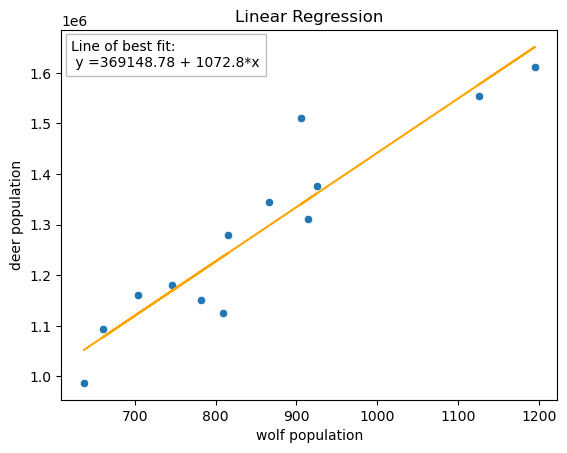


**You have selected Option 2: Time-series Visualization of Data and Trends**
Please provide the relative file path to a CSV containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain at least 2 numeric columns - the first should represent a date or period, and the remaining columns should contain population data.
WisconsinWolfAnalysis/pdf/wolf_and_deer_pop.csv

TIME SERIES GRAPH (2):



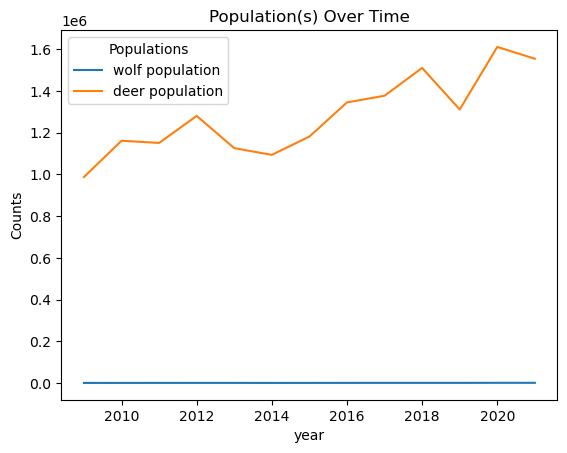

In [5]:
wrapper()

#path to wolf and deer population data: WisconsinWolfAnalysis/pdf/wolf_and_deer_pop.csv

Referencing the statistical test above, it is clear that there is a strong and statistically significant correlation between the wolf population and deer population (correlation coefficient: 0.9312 and p-value: 3.78e-06). The positive correlation runs counter to the commonly held belief that increasing the wolf population will decrease the deer population. Examining the 2021-2023 Deer Population Objectives map (Deer Management), a majority of deer management zones in Wisconsin appear to be striving for constant or increased herd numbers. Given ongoing human intervention in deer populations, it is possible that expected predator/prey relationships may be obscured. Additionally, it is difficult to discern how much of wolf predation is additive (e.g., wolves kill more deer than would die of natural causes) or compensatory (e.g., wolves kill deer that would have otherwise died of natural causes) (Hunting & Feeding Behavior: International Wolf Center 2020). Assuming predation is a combination of both behaviors, it is possible that the additive killing of deer is insufficient to limit or decrease the overall population, despite the addition of more wolves.
#### Testing the relationship between wolf population size and the number of deer with Chronic Wasting Disease (CWD)


----------------Statistical Analysis-------------
Hello! Would you like to statistically test the correlation between two variables (1), examine trends over time (2), and/or compare two proportions (3)? 
Please enter a comma separated list of the desired options.
1,2

**You have selected Option 1: Testing Correlation Between Two Variables**
Please provide the relative file path to the CSV file containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain 3 columns - the 1st can be any form (e.g., a year or other sample identifier), the 2nd is population 1 data, and the 3rd is population 2 data.
WisconsinWolfAnalysis/pdf/wolf_pop_cwd_positive.csv

CORRELATION HYPOTHESIS TEST (1):

The program will perform a simple linear regression and calculate 
the Pearson Correlation Coefficient for the independent and dependent populations.
All tests use 0.05 level of significance and two-sided hypothesis tests.

-------------------------RES

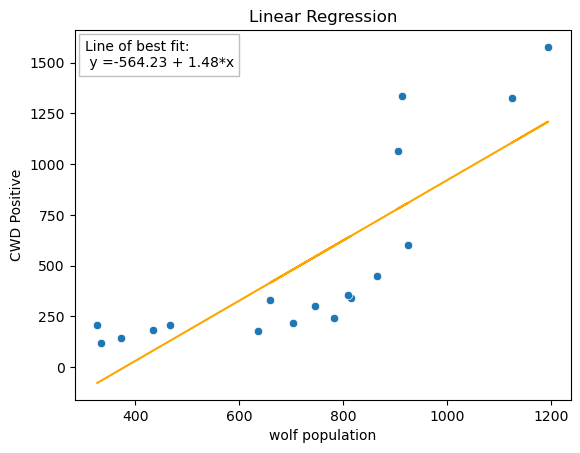


**You have selected Option 2: Time-series Visualization of Data and Trends**
Please provide the relative file path to a CSV containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain at least 2 numeric columns - the first should represent a date or period, and the remaining columns should contain population data.
WisconsinWolfAnalysis/pdf/wolf_pop_cwd_positive.csv

TIME SERIES GRAPH (2):



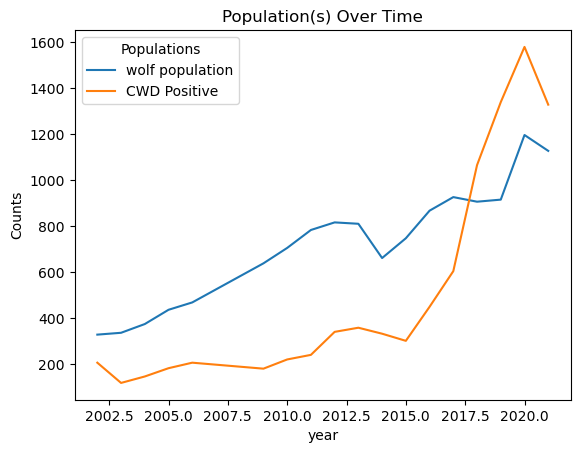

In [6]:
wrapper()

#path to wolf and deer with CWD population data: WisconsinWolfAnalysis/pdf/wolf_pop_cwd_positive.csv

Consistent with the idea of compensatory predation we would expect the number of sick deer to decrease as the number of wolves increases. Here we've chosen to use deer with Chronic Wasting Disease (CWD) as a proxy for sick deer more generally. Again we are met with a surprising and statistically significant correlation coefficient (0.809 with a p-value of 4.8e-05). It would appear that as the number of wolves increases, so does the number of deer with CWD. However, given wolves are not currently known to contract or spread CWD, it is unlikely that increased numbers of wolves are leading to more infected deer (Robbins, 2020). Rather, it is possible that wolves were not reversing the trend of deer with CWD given the speed and initial subtlety of contagion, interest in other prey, lack of proximity to infected animals, and/or insufficient number of wolves. The spike in number of CWD positive deer would suggest that the speed or subtlety of contagion could be a significant factor. Given the severity of CWD and possibility of transmission to other animals, the role of wolves in containing the spread of CWD is an ongoing body of research (Robbins, 2020). It is also interesting to note the decrease in number of wolves and CWD-positive deer in 2020, the reason for which is currently unknown.

### Question 2: Has the growing wolf population impacted humans?
Specifically, we are interested in how growing wolf populations impact domestic animals, hunting, and contact with humans. It is a commonly held belief that increasing the population of wolves will lead to more cattle and pet deaths. Additionally, there is often concern about competition for resources leading to fewer deer seen and killed by human hunters. Finally, we are interested if unpermitted human contact with wolves is increasing as the number of animals grows, proxied by the number of open law enforcement investigations concerning wolves.
#### Testing the correlation between wolf population size and number of cattle killed by wolves


----------------Statistical Analysis-------------
Hello! Would you like to statistically test the correlation between two variables (1), examine trends over time (2), and/or compare two proportions (3)? 
Please enter a comma separated list of the desired options.
1,2

**You have selected Option 1: Testing Correlation Between Two Variables**
Please provide the relative file path to the CSV file containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain 3 columns - the 1st can be any form (e.g., a year or other sample identifier), the 2nd is population 1 data, and the 3rd is population 2 data.
WisconsinWolfAnalysis/pdf/wolf_pop_cattle_killed.csv

CORRELATION HYPOTHESIS TEST (1):

The program will perform a simple linear regression and calculate 
the Pearson Correlation Coefficient for the independent and dependent populations.
All tests use 0.05 level of significance and two-sided hypothesis tests.

-------------------------RE

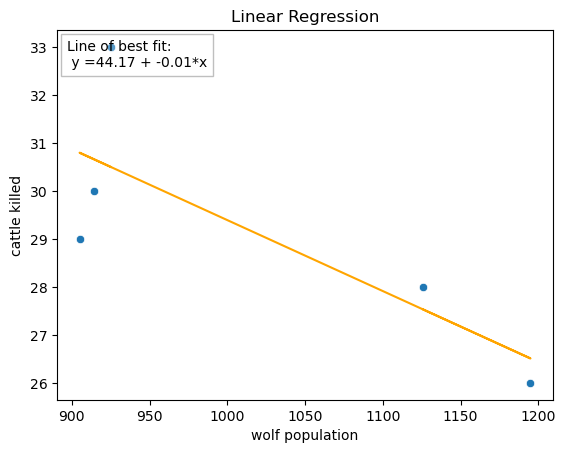


**You have selected Option 2: Time-series Visualization of Data and Trends**
Please provide the relative file path to a CSV containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain at least 2 numeric columns - the first should represent a date or period, and the remaining columns should contain population data.
WisconsinWolfAnalysis/pdf/wolf_pop_cattle_killed.csv

TIME SERIES GRAPH (2):



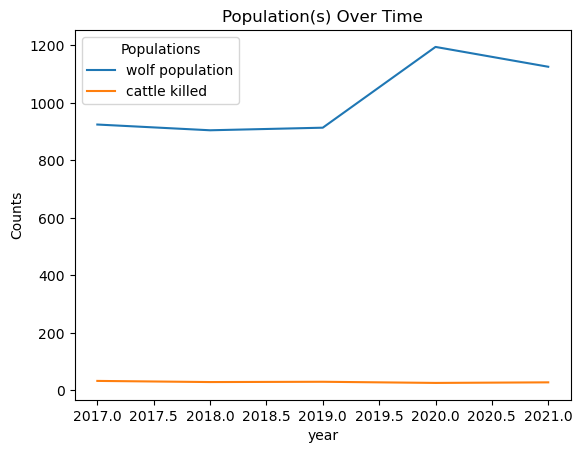

In [7]:
wrapper()

#path to wolf and cattle data: WisconsinWolfAnalysis/pdf/wolf_pop_cattle_killed.csv

We fail to reject the null hypothesis of no linear relationship between cattle killed by wolves and the growing wolf population. We also fail to reject the null hypothesis of a correlation coefficient equal to zero. While it is possible that cattle attacks and wolves are truly uncorrelated, given the limited number of observations, more data would be preferable before confidently dismissing the zero correlation.
#### Testing the correlation between wolf population size and number of dogs killed by wolves


----------------Statistical Analysis-------------
Hello! Would you like to statistically test the correlation between two variables (1), examine trends over time (2), and/or compare two proportions (3)? 
Please enter a comma separated list of the desired options.
1,2

**You have selected Option 1: Testing Correlation Between Two Variables**
Please provide the relative file path to the CSV file containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain 3 columns - the 1st can be any form (e.g., a year or other sample identifier), the 2nd is population 1 data, and the 3rd is population 2 data.
WisconsinWolfAnalysis/pdf/wolf_pop_dogs_killed.csv

CORRELATION HYPOTHESIS TEST (1):

The program will perform a simple linear regression and calculate 
the Pearson Correlation Coefficient for the independent and dependent populations.
All tests use 0.05 level of significance and two-sided hypothesis tests.

-------------------------RESU

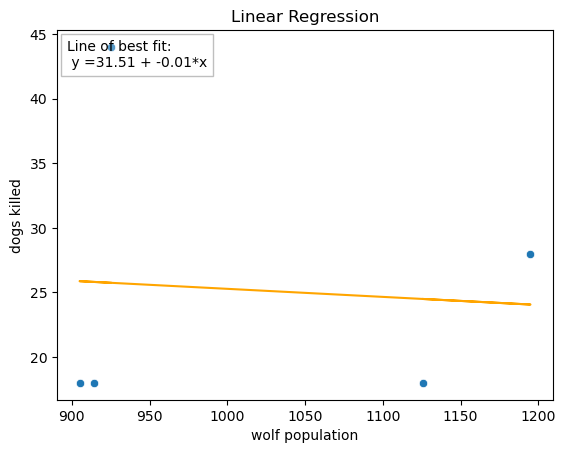


**You have selected Option 2: Time-series Visualization of Data and Trends**
Please provide the relative file path to a CSV containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain at least 2 numeric columns - the first should represent a date or period, and the remaining columns should contain population data.
WisconsinWolfAnalysis/pdf/wolf_pop_dogs_killed.csv

TIME SERIES GRAPH (2):



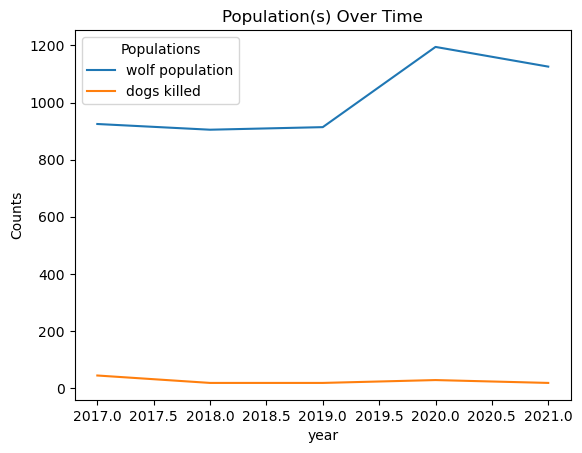

In [8]:
wrapper()

#path to wolf and dog data: WisconsinWolfAnalysis/pdf/wolf_pop_dogs_killed.csv

Similarly, we fail to reject the null hypothesis of no linear relationship between dogs killed by wolves and the growing wolf population. We also fail to reject the null hypothesis of a correlation coefficient equal to zero. While it is possible that dog attacks and wolves are truly uncorrelated, given the limited number of observations, more data would be preferable before confidently dismissing the zero correlation.

#### Testing the correlation between wolf population size and deer seen by hunters


----------------Statistical Analysis-------------
Hello! Would you like to statistically test the correlation between two variables (1), examine trends over time (2), and/or compare two proportions (3)? 
Please enter a comma separated list of the desired options.
1,2

**You have selected Option 1: Testing Correlation Between Two Variables**
Please provide the relative file path to the CSV file containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain 3 columns - the 1st can be any form (e.g., a year or other sample identifier), the 2nd is population 1 data, and the 3rd is population 2 data.
WisconsinWolfAnalysis/pdf/wolf_pop_hunter_observations.csv

CORRELATION HYPOTHESIS TEST (1):

The program will perform a simple linear regression and calculate 
the Pearson Correlation Coefficient for the independent and dependent populations.
All tests use 0.05 level of significance and two-sided hypothesis tests.

---------------------

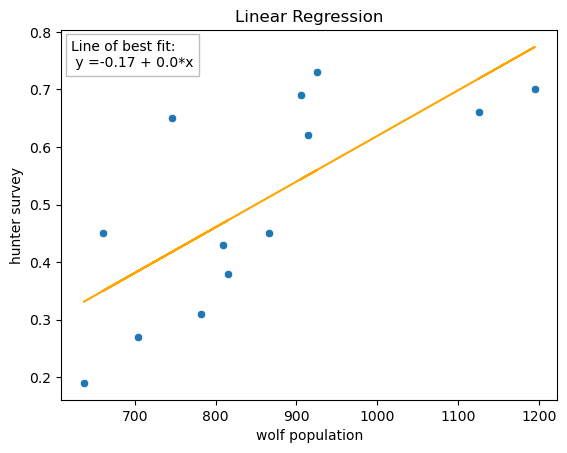


**You have selected Option 2: Time-series Visualization of Data and Trends**
Please provide the relative file path to a CSV containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain at least 2 numeric columns - the first should represent a date or period, and the remaining columns should contain population data.
WisconsinWolfAnalysis/pdf/wolf_pop_hunter_observations.csv

TIME SERIES GRAPH (2):



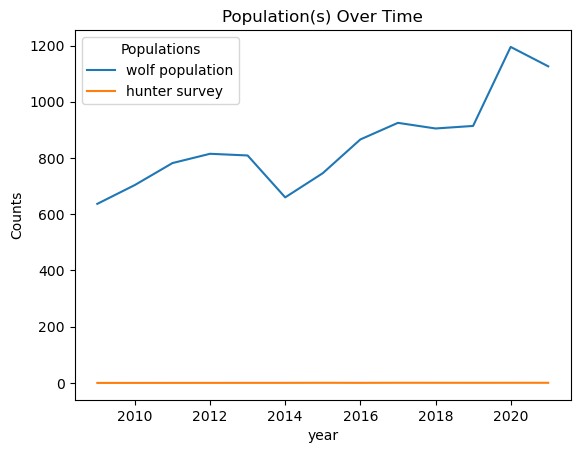

In [9]:
wrapper()

#path to wolf and deer seen by hunters data: WisconsinWolfAnalysis/pdf/wolf_pop_hunter_observations.csv

Interestingly we find a statistically significant relatively-strong positive correlation between the number of deer seen by hunters per hunted hour and the number of wolves present in Wisconsin. This would appear to assuage the concern that there are fewer visible deer for humans to hunt when the wolf population increases. For this analysis we chose to use data gathered by hunters who volunteered their observations throughout deer season. A second survey exists which polls hunters at the time of deer registration (e.g., after a successful kill), however, we believe that collecting data only from successful hunters would create a biased sample. Examining the Wisconsin Department of Natural Resources' Deer Seen Per Hunted Hour metrics, it's clear that hunters who register deer also report seeing more deer. Thus, we hope that using any deer hunters' observations will reduce success bias. Additionally, hunters are encouraged to report their activities and observations even if no wildlife is sighted, further reducing bias. Given the data represents an average of annual observations, the deer sighted ratio should not be interpreted as constant throughout the season. The data should also be interpreted directionally as year to year variations are possible due to a number of factors including changes in season structure, deer movements, weather, and hunter behavior. (Hunters Field Observations of Deer During the Season)
#### Testing the correlation between wolf population size and deer killed by hunters


----------------Statistical Analysis-------------
Hello! Would you like to statistically test the correlation between two variables (1), examine trends over time (2), and/or compare two proportions (3)? 
Please enter a comma separated list of the desired options.
1,2

**You have selected Option 1: Testing Correlation Between Two Variables**
Please provide the relative file path to the CSV file containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain 3 columns - the 1st can be any form (e.g., a year or other sample identifier), the 2nd is population 1 data, and the 3rd is population 2 data.
WisconsinWolfAnalysis/pdf/wolf_pop_deer_harvest.csv

CORRELATION HYPOTHESIS TEST (1):

The program will perform a simple linear regression and calculate 
the Pearson Correlation Coefficient for the independent and dependent populations.
All tests use 0.05 level of significance and two-sided hypothesis tests.

-------------------------RES

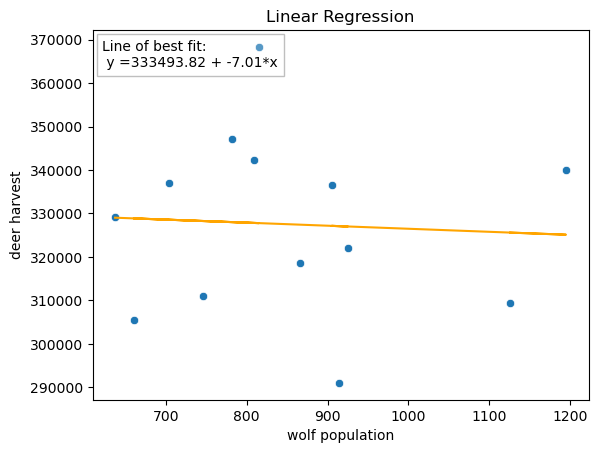


**You have selected Option 2: Time-series Visualization of Data and Trends**
Please provide the relative file path to a CSV containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain at least 2 numeric columns - the first should represent a date or period, and the remaining columns should contain population data.
WisconsinWolfAnalysis/pdf/wolf_pop_deer_harvest.csv

TIME SERIES GRAPH (2):



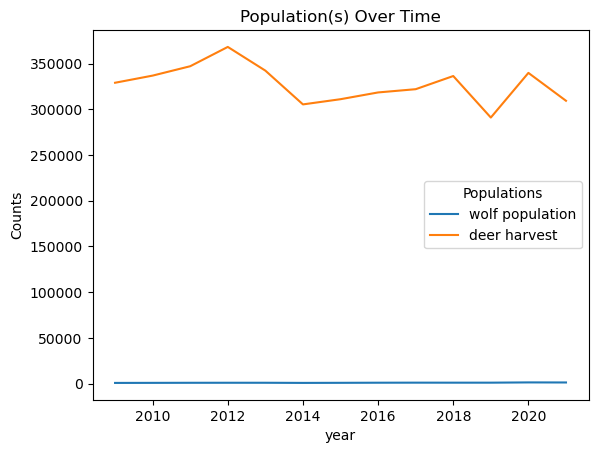

In [10]:
wrapper()

#path to wolf and deer killed by hunters data: WisconsinWolfAnalysis/pdf/wolf_pop_deer_harvest.csv

We fail to reject the null hypotheses of no linear relationship and no correlation between deer harvested and the growing wolf population given the slope of the best fit line and correlation coefficient cannot be differentiated from zero with statistical significance. However, looking at the data, it would appear that there are sufficient data points to create a meaningful line of best fit. We interpret this result as the wolf population does not predict and has no correlation with the number of deer harvested. Given the number of deer available for harvest is set by the state and the number of wolves does not appear to be constrained by the number of deer, we are unsurprised to see zero correlation.
#### Testing the correlation between wolf population size and law enforcement investigations


----------------Statistical Analysis-------------
Hello! Would you like to statistically test the correlation between two variables (1), examine trends over time (2), and/or compare two proportions (3)? 
Please enter a comma separated list of the desired options.
1,2

**You have selected Option 1: Testing Correlation Between Two Variables**
Please provide the relative file path to the CSV file containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain 3 columns - the 1st can be any form (e.g., a year or other sample identifier), the 2nd is population 1 data, and the 3rd is population 2 data.
WisconsinWolfAnalysis/pdf/wolf_pop_investigations.csv

CORRELATION HYPOTHESIS TEST (1):

The program will perform a simple linear regression and calculate 
the Pearson Correlation Coefficient for the independent and dependent populations.
All tests use 0.05 level of significance and two-sided hypothesis tests.

-------------------------R

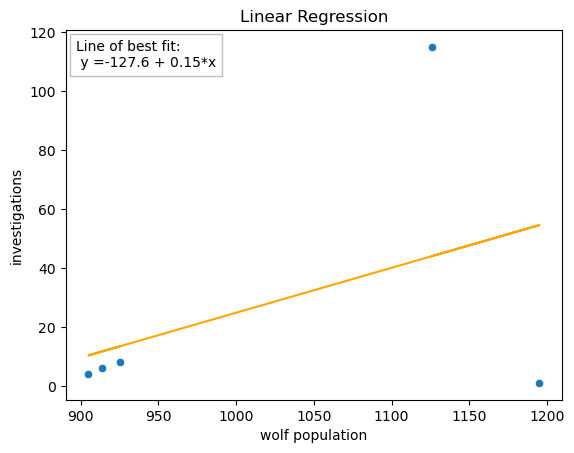


**You have selected Option 2: Time-series Visualization of Data and Trends**
Please provide the relative file path to a CSV containing the data you wish to use. Do not encase the file path in quotes or other symbols.
Note, the CSV must contain at least 2 numeric columns - the first should represent a date or period, and the remaining columns should contain population data.
WisconsinWolfAnalysis/pdf/wolf_pop_investigations.csv

TIME SERIES GRAPH (2):



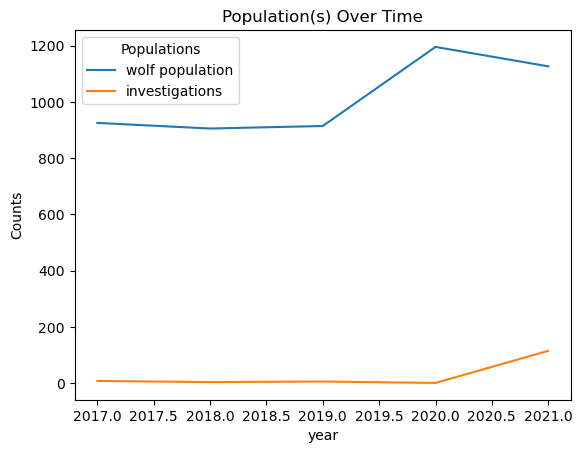

In [11]:
wrapper()

#path to wolf and law enforcement data: WisconsinWolfAnalysis/pdf/wolf_pop_investigations.csv

We fail to reject the null hypothesis of no linear relationship between wolf-focused law enforcement investigations and the growing wolf population. We also fail to reject the null hypothesis of a correlation coefficient equal to zero. While it is possible that the number of wolf-related investigations and the number of wolves are truly uncorrelated, given the limited number of observations, more data would be preferable before confidently dismissing the zero correlation.

### Question 3: How have the lives and deaths of wolves changed over the reporting period?

#### Background and Context:
Our team identified this question as supplemental, to be addressed as time allowed, and it is quite broad. However, we were able to identify some data on the health of the wolf population between 2017 and 2022 from Wisconsin. The data comes from an annual gray wolf monitoring report published by the Wisconsin Department of Natural Resources (Wolves in Wisconsin). It contains data on the body condition and detection of ectoparasites (mange and ticks) in captured wolves and mortalities. Below is the data after preprocessing.

In [12]:
import pandas as pd
df = pd.read_csv('WisconsinWolfAnalysis/pdf/proportion_of_wolves.csv')
df.head(6)

,Unnamed: 0,research captures,good body condition,fair body condition,poor body condition,with mange,with ticks
0,2017,33,29,2,2,1,19
1,2018,36,32,3,1,0,24
2,2019,40,33,4,3,0,23
3,2020,25,22,0,3,0,18
4,2021,18,18,0,0,0,13
5,2022,14,12,2,0,1,9


#### Testing for changes in the health of the wolf population
Our team refined the research question above to measuring the change in health of the wolf population. Specifically, has the proportion of research captured wolves possessing characteristic x changed with statistical significance? Here x is the various characteristics of interest (good, fair, and poor body condition, with mange, and with ticks). 

To answer these questions, our team wrote several Python functions to perform a series of 2-sample Z tests for proportions. Let p1 and p2 be the proportion of captured wolves exhibiting the characteristic of interest in 2017 and 2022, respectively. Then, for each characteristic of interest, we define the null hypothesis as H0: p1 = p2, and the alternative hypothesis as Ha: p1 != p2. We use a significance level of 0.05, where p-values greater than 0.05 lead us to fail to reject the null hypothesis. 


----------------Statistical Analysis-------------
Hello! Would you like to statistically test the correlation between two variables (1), examine trends over time (2), and/or compare two proportions (3)? 
Please enter a comma separated list of the desired options.
3

**You have selected Option 3: Comparing Two Proportions**
Please provide the relative file path to a CSV file containing the data you wish to use. Do not encase the file path in quotes or other symbols. 
Note, the CSV must contain at least 3 columns - the first must be numeric (e.g., a year), the second must be the total number of observations, and the third+ must be the number of observations with a specific characteristic of interest.
WisconsinWolfAnalysis/pdf/proportion_of_wolves.csv

PROPORTION HYPOTHESIS TEST (3):

The program will perform a 2-sample Z test for proportions at the 0.05 significance level for each provided variable.
-------------------------RESULTS-------------------------

****
VARIABLE: good body cond

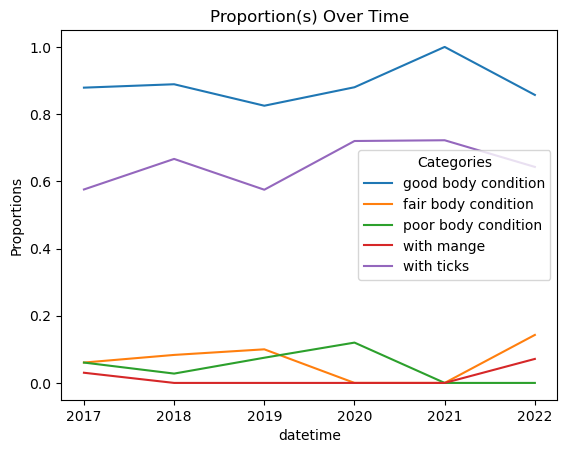

In [13]:
wrapper()

#path to wolf and deer population data: WisconsinWolfAnalysis/pdf/proportion_of_wolves.csv

By examining the results of the statistical analysis performed by our code above, we note that in all 5 hypothesis tests, we fail to reject the null hypothesis, meaning that based on the collected data, there is not a statistically significant difference between the health of the Wisconsin wolf population in 2017 vs 2022. Additionally, from the Proportion(s) Over Time plot, we see that each of the proportions has increased and decreased over time - with no discernable, consistent trend. 

As future work, we would expand this test to examine the validity of assumptions that undergird the Z-test for proportions (such as independence and large sample size).

## Conclusions
In conclusion, we find that increasing numbers of wolves do not appear to be lessening the number of deer seen or harvested by hunters. We also find that the wolves do not appear to be causing a decrease in the deer population as a whole, or the population with Chronic Wasting Disease. Finally, we do not have sufficient evidence to conclusively correlate the wolf population with the numbers of cattle and dogs killed by wolves or police investigations involving wolves. 

With respect to the changing health of the wolf population, we find no statistically significant differences in body condition or the detection of ectoparasites.

We acknowledge these are complex issues with many factors at play, and a more thorough and expert investigation is warranted into each of these observations.

## References

Deer Management. Deer management | | Wisconsin DNR. (n.d.). Retrieved March 12, 2023, from https://dnr.wisconsin.gov/topic/WildlifeHabitat/deermanagement.html 

Hunting & Feeding Behavior: International Wolf Center. International Wolf Center | Teaching the World about Wolves. (2020, July 27). Retrieved March 12, 2023, from https://wolf.org/wolf-info/basic-wolf-info/biology-and-behavior/hunting-feeding-behavior/#:~:text=In%20Minnesota%2C%20for%20example%2C%20each,adult%2Dsized%20deer%20per%20year. 

Robbins, J. (2020, November 12). Using Wolves as first responders against a deadly brain disease. The New York Times. Retrieved March 12, 2023, from https://www.nytimes.com/2020/11/12/science/wolves-chronic-wasting-disease.html 

Wisconsin Department of Natural Resources. (n.d.). Hunters Field Observations of Deer During the Season. Deer statistics. Retrieved March 12, 2023, from https://dnr.wi.gov/wideermetrics/DeerStats.aspx?R=OBSurvey#background 

Wolves in Wisconsin. Wolves in Wisconsin | | Wisconsin DNR. (n.d.). Retrieved March 12, 2023, from https://dnr.wisconsin.gov/topic/WildlifeHabitat/wolf/index.html 